In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display

# Add parent directory to path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from traffic_analyser import demand_matrix_analyser

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


## 1. Load Data and Initialize Analyzer

In [2]:
# Path to example CSV
csv_path = '../traffic_traces/demand_matrix_csv_example.csv'

# Check if file exists
if not os.path.exists(csv_path):
    print(f"Error: File not found at {csv_path}")
else:
    print(f"Found CSV file: {csv_path}")
    print(f"File size: {os.path.getsize(csv_path) / 1024:.2f} KB")

Found CSV file: ../traffic_traces/demand_matrix_csv_example.csv
File size: 6488.91 KB


## 2. Compare Per-Interval vs Accumulated Modes

In [3]:
# Initialize with per-interval mode (default)
print("Initializing with per-interval mode (default)...")
analyzer_per_interval = demand_matrix_analyser(
    input_csv_path=csv_path,
    V=36, D=5, topo_name="RRG", EPR=1,
    Cap_core=16.0, Cap_access=16.0,
    suffix="per_interval",
    use_per_interval=True  # Default
)

print("\nInitializing with accumulated mode...")
analyzer_accumulated = demand_matrix_analyser(
    input_csv_path=csv_path,
    V=36, D=5, topo_name="RRG", EPR=1,
    Cap_core=16.0, Cap_access=16.0,
    suffix="accumulated",
    use_per_interval=False
)

print("\n✓ Both analyzers initialized successfully")

Initializing with per-interval mode (default)...

Initializing with accumulated mode...

✓ Both analyzers initialized successfully


## 3. Compare Statistics

In [4]:
print("Per-Interval Mode Statistics:")
analyzer_per_interval.print_statistics()

print("\n" + "="*60)
print("Accumulated Mode Statistics:")
analyzer_accumulated.print_statistics()

Per-Interval Mode Statistics:

Demand Matrix Statistics (per-interval mode): (36, 5)_RRG_1_EPR
Number of time samples: 40
Sampling interval: 10000.00 us (10000000 ns)

Total Traffic (Gbps):
  Mean: 0.58
  Std:  0.01
  Min:  0.56
  Max:  0.59

Max Flow (Gbps):
  Mean: 0.0034
  Std:  0.0004
  Min:  0.0025
  Max:  0.0041

Matrix Sparsity (fraction of zeros):
  Mean: 0.5814
  Std:  0.0118
  Min:  0.5556
  Max:  0.6119


Accumulated Mode Statistics:

Demand Matrix Statistics (accumulated mode): (36, 5)_RRG_1_EPR
Number of time samples: 40
Sampling interval: 10000.00 us (10000000 ns)

Total Traffic (Gbps):
  Mean: 11.82
  Std:  6.65
  Min:  0.59
  Max:  23.06

Max Flow (Gbps):
  Mean: 0.0181
  Std:  0.0080
  Min:  0.0033
  Max:  0.0319

Matrix Sparsity (fraction of zeros):
  Mean: 0.0583
  Std:  0.0992
  Min:  0.0278
  Max:  0.5772



## 4. Visualize Individual Matrices at Different Time Points

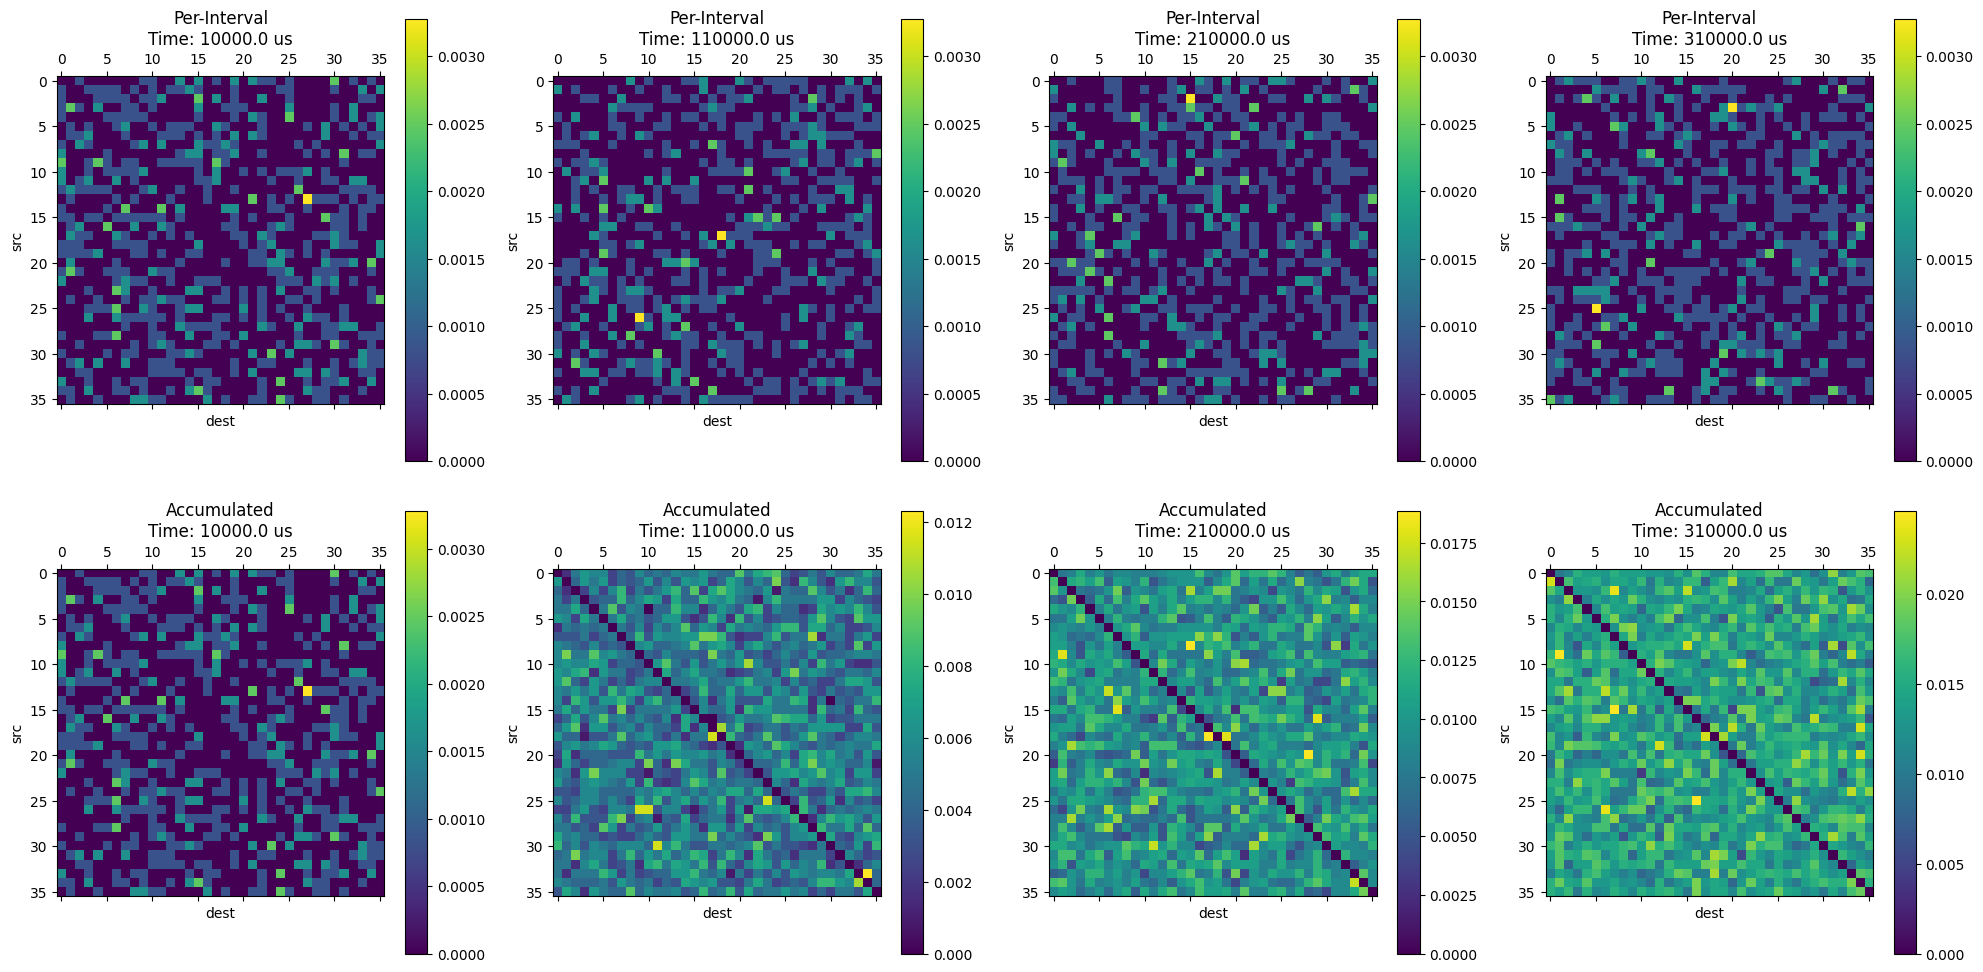


Note: Per-interval shows traffic in each time window.
      Accumulated shows cumulative traffic up to that point.


In [5]:
# Plot matrices at specific time points for comparison
time_indices = [0, 10, 20, 30]  # First, middle, and later time points

fig, axes = plt.subplots(2, len(time_indices), figsize=(20, 10))

for i, idx in enumerate(time_indices):
    if idx < len(analyzer_per_interval.demand_matrices):
        # Per-interval
        ts, matrix = analyzer_per_interval.demand_matrices[idx]
        im1 = axes[0, i].matshow(matrix, vmin=0, vmax=np.max(matrix))
        axes[0, i].set_title(f'Per-Interval\nTime: {ts/1000:.1f} us')
        axes[0, i].set_xlabel('dest')
        axes[0, i].set_ylabel('src')
        plt.colorbar(im1, ax=axes[0, i])
        
        # Accumulated
        ts, matrix = analyzer_accumulated.demand_matrices[idx]
        im2 = axes[1, i].matshow(matrix, vmin=0, vmax=np.max(matrix))
        axes[1, i].set_title(f'Accumulated\nTime: {ts/1000:.1f} us')
        axes[1, i].set_xlabel('dest')
        axes[1, i].set_ylabel('src')
        plt.colorbar(im2, ax=axes[1, i])

plt.tight_layout()
plt.show()

print("\nNote: Per-interval shows traffic in each time window.")
print("      Accumulated shows cumulative traffic up to that point.")

## 5. Plot Average Demand Matrix

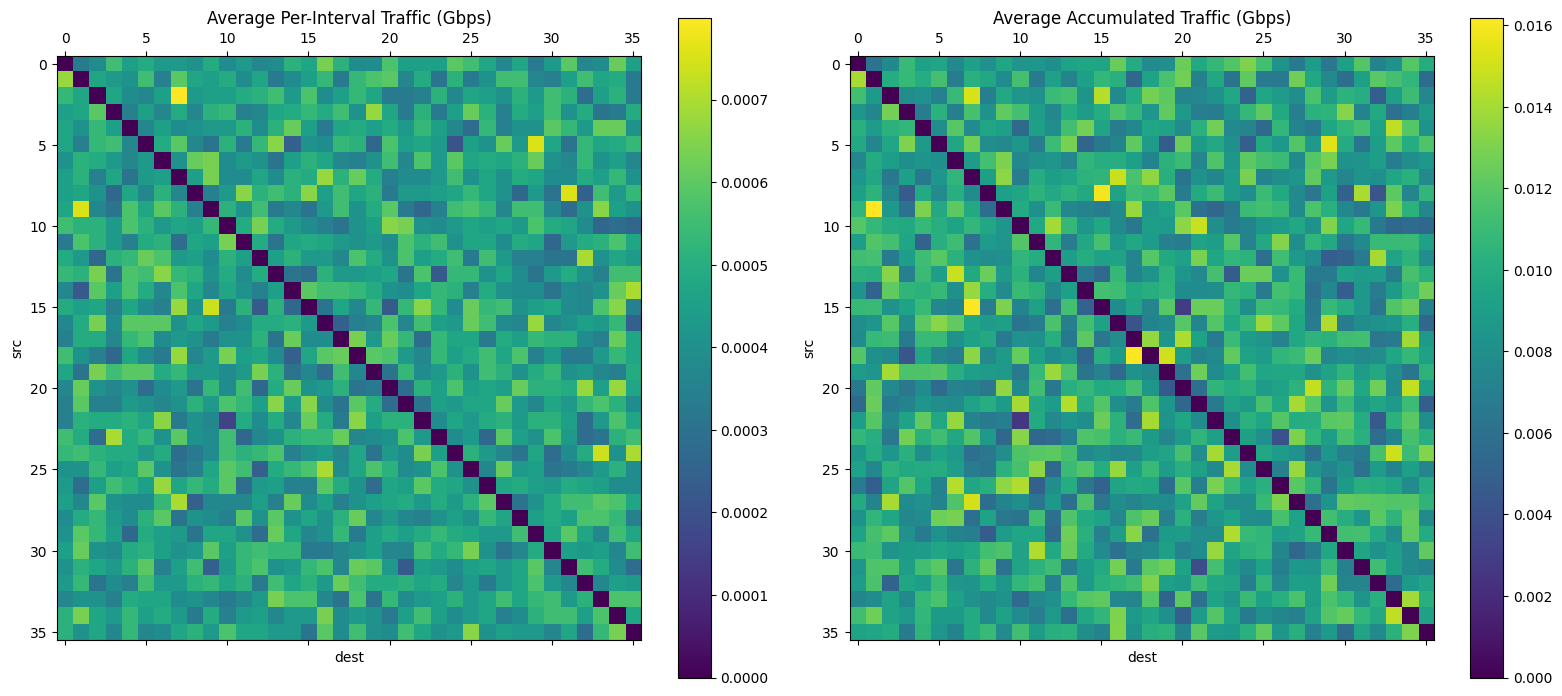


Per-interval - Total avg traffic: 0.58 Gbps
Per-interval - Max flow: 0.0008 Gbps

Accumulated - Total avg traffic: 11.82 Gbps
Accumulated - Max flow: 0.0162 Gbps


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Per-interval average
avg_per_interval = analyzer_per_interval.get_accumulated_demand_matrix(plot=False)
im1 = axes[0].matshow(avg_per_interval, vmin=0, vmax=np.max(avg_per_interval))
axes[0].set_title('Average Per-Interval Traffic (Gbps)')
axes[0].set_xlabel('dest')
axes[0].set_ylabel('src')
plt.colorbar(im1, ax=axes[0])

# Accumulated average
avg_accumulated = analyzer_accumulated.get_accumulated_demand_matrix(plot=False)
im2 = axes[1].matshow(avg_accumulated, vmin=0, vmax=np.max(avg_accumulated))
axes[1].set_title('Average Accumulated Traffic (Gbps)')
axes[1].set_xlabel('dest')
axes[1].set_ylabel('src')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

print(f"\nPer-interval - Total avg traffic: {np.sum(avg_per_interval):.2f} Gbps")
print(f"Per-interval - Max flow: {np.max(avg_per_interval):.4f} Gbps")
print(f"\nAccumulated - Total avg traffic: {np.sum(avg_accumulated):.2f} Gbps")
print(f"Accumulated - Max flow: {np.max(avg_accumulated):.4f} Gbps")

## 6. Create Animation - Per-Interval Traffic

In [7]:
print("Creating animation for per-interval traffic...")
ani_per_interval = analyzer_per_interval.visualize_demand_evolution(vmax=None)
print("Animation created!")

Creating animation for per-interval traffic...
Animation created!


In [8]:
# Display animation in notebook
HTML(ani_per_interval.to_jshtml())

## 7. Create Animation - Accumulated Traffic

In [9]:
print("Creating animation for accumulated traffic...")
ani_accumulated = analyzer_accumulated.visualize_demand_evolution(vmax=None)
print("Animation created!")

Creating animation for accumulated traffic...
Animation created!


In [10]:
# Display animation in notebook
HTML(ani_accumulated.to_jshtml())

## 8. Analyze Traffic Patterns Over Time

In [11]:
# Extract total traffic and max flow over time
times_per_interval = []
total_traffic_per_interval = []
max_flow_per_interval = []

for ts, matrix in analyzer_per_interval.demand_matrices:
    times_per_interval.append(ts / 1000)  # Convert to microseconds
    total_traffic_per_interval.append(np.sum(matrix))
    max_flow_per_interval.append(np.max(matrix))

times_accumulated = []
total_traffic_accumulated = []
max_flow_accumulated = []

for ts, matrix in analyzer_accumulated.demand_matrices:
    times_accumulated.append(ts / 1000)
    total_traffic_accumulated.append(np.sum(matrix))
    max_flow_accumulated.append(np.max(matrix))

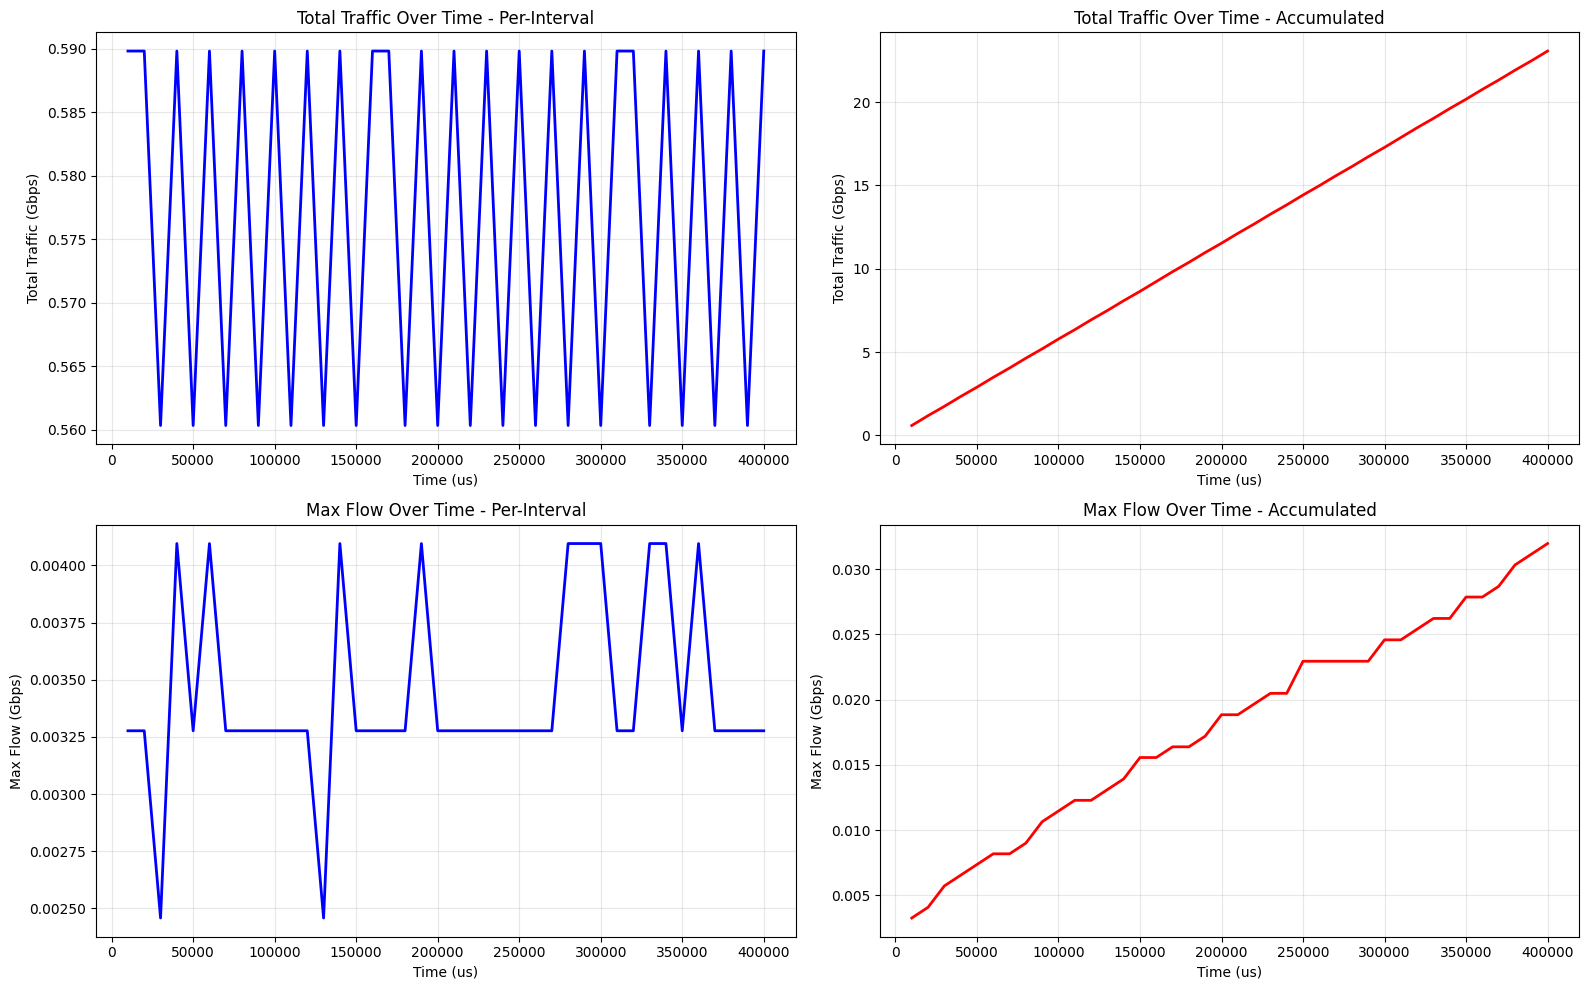


Observations:
- Per-interval: Shows instantaneous traffic rate in each window
- Accumulated: Shows monotonically increasing cumulative traffic


In [12]:
# Plot time series
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Total traffic - Per-interval
axes[0, 0].plot(times_per_interval, total_traffic_per_interval, 'b-', linewidth=2)
axes[0, 0].set_title('Total Traffic Over Time - Per-Interval')
axes[0, 0].set_xlabel('Time (us)')
axes[0, 0].set_ylabel('Total Traffic (Gbps)')
axes[0, 0].grid(True, alpha=0.3)

# Total traffic - Accumulated
axes[0, 1].plot(times_accumulated, total_traffic_accumulated, 'r-', linewidth=2)
axes[0, 1].set_title('Total Traffic Over Time - Accumulated')
axes[0, 1].set_xlabel('Time (us)')
axes[0, 1].set_ylabel('Total Traffic (Gbps)')
axes[0, 1].grid(True, alpha=0.3)

# Max flow - Per-interval
axes[1, 0].plot(times_per_interval, max_flow_per_interval, 'b-', linewidth=2)
axes[1, 0].set_title('Max Flow Over Time - Per-Interval')
axes[1, 0].set_xlabel('Time (us)')
axes[1, 0].set_ylabel('Max Flow (Gbps)')
axes[1, 0].grid(True, alpha=0.3)

# Max flow - Accumulated
axes[1, 1].plot(times_accumulated, max_flow_accumulated, 'r-', linewidth=2)
axes[1, 1].set_title('Max Flow Over Time - Accumulated')
axes[1, 1].set_xlabel('Time (us)')
axes[1, 1].set_ylabel('Max Flow (Gbps)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Per-interval: Shows instantaneous traffic rate in each window")
print("- Accumulated: Shows monotonically increasing cumulative traffic")

## 9. Test Sampling Functionality

In [13]:
# Get valid sample counts
stats = analyzer_per_interval.get_statistics()
num_matrices = stats['num_matrices']
print(f"Total matrices: {num_matrices}")

valid_samples = [i for i in [1, 2, 4, 5, 8, 10, 20] if num_matrices % i == 0]
print(f"Valid sample counts: {valid_samples}")

if valid_samples:
    num_samples = valid_samples[min(2, len(valid_samples)-1)]  # Pick one
    print(f"\nSampling with {num_samples} samples...")
    
    matrices, weights, interval_us = analyzer_per_interval.sample_traffic(
        num_samples=num_samples,
        filtering_threshold=0.0
    )
    
    print(f"  Sampled {len(matrices)} matrices")
    print(f"  Weights: {weights}")
    print(f"  Sampling interval: {interval_us:.2f} us")
    print(f"  Matrix shape: {matrices[0].shape}")
    print(f"  Average total traffic: {np.mean([m.sum() for m in matrices]):.2f} Gbps")

Total matrices: 40
Valid sample counts: [1, 2, 4, 5, 8, 10, 20]

Sampling with 4 samples...
  Sampled 4 matrices
  Weights: [0.25, 0.25, 0.25, 0.25]
  Sampling interval: 100000.00 us
  Matrix shape: (36, 36)
  Average total traffic: 0.58 Gbps


## 10. Summary and Recommendations

In [14]:
print("="*70)
print("SUMMARY")
print("="*70)
print("\n✓ Per-interval mode (default):")
print("  - Extracts traffic demand per time window")
print("  - Suitable for traffic engineering and routing optimization")
print("  - Shows instantaneous demand patterns")
print("\n✓ Accumulated mode:")
print("  - Shows cumulative traffic over time")
print("  - Useful for understanding total data transferred")
print("  - Monotonically increasing values")
print("\n✓ Animation:")
print("  - visualize_demand_evolution() creates animated heatmaps")
print("  - Can be displayed in notebooks or saved to file")
print("\n✓ Sampling:")
print("  - num_samples must be a divisor of total matrices")
print("  - Matrices are averaged over aggregation windows")
print("\nRECOMMENDATION: Use per-interval mode (default) for most analyses.")
print("="*70)

SUMMARY

✓ Per-interval mode (default):
  - Extracts traffic demand per time window
  - Suitable for traffic engineering and routing optimization
  - Shows instantaneous demand patterns

✓ Accumulated mode:
  - Shows cumulative traffic over time
  - Useful for understanding total data transferred
  - Monotonically increasing values

✓ Animation:
  - visualize_demand_evolution() creates animated heatmaps
  - Can be displayed in notebooks or saved to file

✓ Sampling:
  - num_samples must be a divisor of total matrices
  - Matrices are averaged over aggregation windows

RECOMMENDATION: Use per-interval mode (default) for most analyses.
